# Equipo 4
## Grupo 002 (Miércoles 7:00 pm - 10:00 pm)
### Integrantes:
* Sabina Alejandra Castillo Trujillo mat. 1804029
* Vítor Hugo Alanís Aguirre mat. 1821920
* Jesús Ramón Castro Hernández mat. 1887860

# World Development Indicators
https://www.kaggle.com/worldbank/world-development-indicators?select=Indicators.csv


## Descripción de los datos
Los datos contenidos en esta tabla son indicadores que se obtuvieron de la página del Banco Mundial (una organización multinacional especializada en finanzas y asistencia), la cual a su vez compiló esta información de fuentes internacionales oficialmente reconocidas.
La base de datos consta únicamente de 6 columnas:
+ CountryName: contiene los nombres de los países que se van a estudiar, los cuales son alrededor de 247 países (Texto).
+ CountryCode: a cada país le corresponde un código o una abreviatura para poder diferenciarlo de los demás países e identificarlo de manera rápida (Texto).
+ IndicatorName: esta columna guarda los nombres de todos los indicadores que el Banco Nacional ha registrado de los diferentes países (los cuales son alrededor de 1344). Estos indicadores contienen información sobre agricultura, clima, crecimiento económico, salud, población, pobreza, etc. (Texto).
+ IndicatorCode: a cada indicador le corresponde una abreviatura única que lo diferencia de los demás indicadores (Texto).
+ Year: año al que corresponde el resultado del indicador de un determinado país (Número flotante).
+ Value: resultado que el indicador arroja dependiendo de sus unidades (ya sea en porcentajes, en miles, millones, etc.) (Número flotante).

## Justificación de los datos
Una de las características que nos llamó la atención y que nos hizo querer trabajar con estos datos es la gran cantidad de información que esta base tiene, en especial el gran número de indicadores con los que cuenta y la variedad de rubros a los que estos indicadores de desarrollo están enfocados. 
A simple vista nos pudimos dar cuenta que se podían sacar muchas conclusiones con base en esta información, ya que contamos con factores muy valiosos que afectan el desarrollo de una nación y, el hecho de poder cuantificar estos factores y el desarrollo como tal, nos causó aún más emoción
Existen muchos beneficios al trabajar con esta base de datos. Primero que nada tenemos información suficiente en cuanto a cantidad de datos, por lo que si queremos sacar conclusiones o hacer predicciones éstas van a estar bien fundamentadas. 

Segundo, debido a la enorme cantidad de indicadores de desarrollo con los que contamos, nos podemos dar la libertad de desechar algunos que no sean tan relevantes en nuestro estudio, pero sin caer en la falta de información.
Por último pero no menos importante, sentimos que las conclusiones a las que podemos llegar y la solución al planteamiento de nuestro problema pueden ser de interés tanto nacional como internacional, ya que estaríamos viendo el desarrollo de los países de una manera objetiva y cuantificable.


## Objetivos
El objetivo final de este programa (Y de este estudio) es determinar las variables a las que un país le debe poner atención para así aumentar sus posibilidades de ser un país de primer mundo ( o en su defecto simplemente aumentar la calidad de vida de sus habitantes) hay variables que parecen obvias por ejemplo es fácil ver que si el producto interno bruto per cápita aumenta es probable que la calidad de vida general aumente , pero ¿Que tanto afecta? ¿Es la variable más importante? ¿Hay maneras alternas de mejorar la calidad de un país?

Todas estas preguntas son las que buscamos responder, y el objetivo final es más que nada representar dos tipos de variables :
1. Las que tienen en común paises de primer mundo
2. Las que tienen en común países de tercer mundo

Para así poder ver la comparativa general, también se buscará buscar si existen datos atípicos respecto a si existe algún país que pertenezca al primer mundo pero tenga algunas cualidades que se aprecian normalmente en el tercer mundo y viceversa.

# Lectura de datos  
Primero imporaremos pandas y cambiaremos el directorio de trabajo para poder leer la base de datos de manera plana, posteriormente se hara una impresion directa de los datos

In [239]:
import pandas as pd

In [240]:
import os
os.chdir("C:/Users/victo/OneDrive/Documentos")

In [241]:
datos=pd.read_csv("Indicators.csv")

In [242]:
datos

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


# Primer filtracion
Dado que no consideramos hacer un estudio de evolucion temporal si no uno de clasificacion, todos los años no nos interesan, lo que más nos interesa son los datos más recientes (en este caso solo los que son del año 2015)

In [243]:
datos=datos.loc[datos.Year==2015,:]

# Creacion del segundo dataset
Para poder mantener el dataset original los cambios pertinentes se haran en un segundo dataset que cumpla con las cualidades que necesitamos. El problema actualmente viene dado del hecho de que cada indicador es una fila pero para los analisis necesitamos que cada pais sea una fila y que cada columna sea un indicador, esto lamentablemente no puede ser logrado unicamente con una transpocision dado que se necesitan hacer más transformaciones al data set

In [244]:
datos.index=datos.CountryName

In [245]:
import numpy as np

In [246]:
np.unique(datos.IndicatorName)

array(['Average time to clear exports through customs (days)',
       'Bank capital to assets ratio (%)',
       'Bank nonperforming loans to total gross loans (%)',
       'Bird species, threatened',
       'Business extent of disclosure index (0=less disclosure to 10=more disclosure)',
       'Cost of business start-up procedures (% of GNI per capita)',
       'Delay in obtaining an electrical connection (days)',
       'Depth of credit information index (0=low to 8=high)',
       'Disbursements on external debt, long-term (DIS, current US$)',
       'Distance to frontier score (0=lowest performance to 100=frontier)',
       'Ease of doing business index (1=most business-friendly regulations)',
       'Female headed households (% of households with a female head)',
       'Firms competing against unregistered firms (% of firms)',
       'Firms expected to give gifts in meetings with tax officials (% of firms)',
       'Firms formally registered when operations started (% of firms)',


In [247]:
datos_2=pd.DataFrame(index=np.unique(datos.CountryName)) 

In [249]:
for i in np.unique(datos.CountryName):
    indicadores=datos.loc[i,["IndicatorName","Value"]]
    for j in indicadores["IndicatorName"]:
        datos_2.loc[i,j]=float(indicadores.loc[indicadores.IndicatorName==j,"Value"])


In [250]:
datos_2

,Bank capital to assets ratio (%),Bank nonperforming loans to total gross loans (%),"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),Ease of doing business index (1=most business-friendly regulations),"Fish species, threatened",...,Time required to obtain an operating license (days),Time spent dealing with the requirements of government regulations (% of senior management time),Value lost due to electrical outages (% of sales),Poverty gap at national poverty lines (%),Poverty headcount ratio at national poverty lines (% of population),Rural poverty gap at national poverty lines (%),Rural poverty headcount ratio at national poverty lines (% of rural population),Urban poverty gap at national poverty lines (%),Urban poverty headcount ratio at national poverty lines (% of urban population),Female headed households (% of households with a female head)
Afghanistan,12.222749,13.488399,17.0,1.000000,19.000000,0.000000,23323000.0,40.580000,177.000000,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,9.700000,20.900000,10.0,9.000000,10.400000,6.000000,350193000.0,60.500000,97.000000,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,14.0,4.000000,10.900000,0.000000,81867000.0,45.720000,163.000000,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,9.674752,2.487018,13.0,6.000000,82.500000,8.000000,NaN,54.830000,129.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
World,NaN,NaN,4393.0,5.525926,26.065079,4.375661,NaN,61.027778,94.957672,7819.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,18.0,6.000000,68.000000,0.000000,537722000.0,44.540000,170.000000,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,NaN,NaN,18.0,4.000000,33.600000,8.000000,763274000.0,60.500000,97.000000,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Limpieza de NA's
Necesitamos limpiar tanto indicadores como paises que no nos den informacion, en este caso se decidio que debemos eliminar los paises e indicadores cuyas observaciones esten más del 50% vacias, por que consideramos que no nos aportan la suficiente informacion para ser considerados relevantes

In [269]:
print (datos_2.isnull().mean(axis=0) * 100)
datos_3 = datos_2.loc[:, datos_2.isnull().mean() <= .5]

Bank capital to assets ratio (%)                                                   58.943089
Bank nonperforming loans to total gross loans (%)                                  57.723577
Bird species, threatened                                                            0.406504
Business extent of disclosure index (0=less disclosure to 10=more disclosure)      10.162602
Cost of business start-up procedures (% of GNI per capita)                         10.162602
                                                                                     ...    
Rural poverty gap at national poverty lines (%)                                    99.186992
Rural poverty headcount ratio at national poverty lines (% of rural population)    99.186992
Urban poverty gap at national poverty lines (%)                                    99.186992
Urban poverty headcount ratio at national poverty lines (% of urban population)    99.186992
Female headed households (% of households with a female head)         

In [270]:
datos_3

,"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),Ease of doing business index (1=most business-friendly regulations),"Fish species, threatened",Improved sanitation facilities (% of population with access),"Improved sanitation facilities, rural (% of rural population with access)",...,Strength of legal rights index (0=weak to 12=strong),Tax payments (number),Time required to build a warehouse (days),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits)
Afghanistan,17.0,1.000000,19.000000,0.000000,23323000.0,40.580000,177.000000,5.0,31.900000,27.000000,...,9.00000,20.00000,353.000000,1642.000000,114.000000,250.000000,7.000000,275.000000,2.000000,36.300000
Albania,10.0,9.000000,10.400000,6.000000,350193000.0,60.500000,97.000000,44.0,93.200000,90.200000,...,7.00000,34.00000,NaN,525.000000,177.000000,22.000000,5.500000,357.000000,2.000000,36.500000
Algeria,14.0,4.000000,10.900000,0.000000,81867000.0,45.720000,163.000000,40.0,87.600000,82.200000,...,2.00000,27.00000,204.000000,630.000000,180.000000,55.000000,20.000000,385.000000,1.300000,72.700000
American Samoa,8.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,62.500000,62.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,13.0,6.000000,82.500000,8.000000,NaN,54.830000,129.000000,2.0,92.300000,90.200000,...,0.00000,28.00000,108.000000,540.000000,63.000000,49.000000,44.000000,162.000000,NaN,15.300000
World,4393.0,5.525926,26.065079,4.375661,NaN,61.027778,94.957672,7819.0,67.522946,50.327703,...,5.10582,25.64127,160.494054,629.871958,96.634921,48.335676,20.442328,260.712698,2.576786,40.751323
"Yemen, Rep.",18.0,6.000000,68.000000,0.000000,537722000.0,44.540000,170.000000,28.0,NaN,NaN,...,0.00000,44.00000,184.000000,645.000000,110.000000,19.000000,40.000000,248.000000,3.000000,33.100000
Zambia,18.0,4.000000,33.600000,8.000000,763274000.0,60.500000,97.000000,20.0,43.900000,35.700000,...,7.00000,26.00000,208.000000,611.000000,117.000000,45.000000,7.500000,157.000000,2.400000,18.600000


In [271]:
datos_3 = datos_3.loc[ datos_3.isnull().mean(axis=1) <= .5,:]

Afghanistan           23.300971
Albania               25.242718
Algeria               25.242718
American Samoa        90.291262
Andorra               79.611650
                        ...    
West Bank and Gaza    49.514563
World                 53.398058
Yemen, Rep.           31.067961
Zambia                25.242718
Zimbabwe              25.242718
Length: 246, dtype: float64


In [272]:
datos_3

,"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),Ease of doing business index (1=most business-friendly regulations),"Fish species, threatened",Improved sanitation facilities (% of population with access),"Improved sanitation facilities, rural (% of rural population with access)",...,Strength of legal rights index (0=weak to 12=strong),Tax payments (number),Time required to build a warehouse (days),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits)
Afghanistan,17.0,1.000000,19.000000,0.000000,2.332300e+07,40.580000,177.000000,5.0,31.900000,27.000000,...,9.00000,20.00000,353.000000,1642.000000,114.000000,250.000000,7.000000,275.000000,2.000000,36.300000
Albania,10.0,9.000000,10.400000,6.000000,3.501930e+08,60.500000,97.000000,44.0,93.200000,90.200000,...,7.00000,34.00000,NaN,525.000000,177.000000,22.000000,5.500000,357.000000,2.000000,36.500000
Algeria,14.0,4.000000,10.900000,0.000000,8.186700e+07,45.720000,163.000000,40.0,87.600000,82.200000,...,2.00000,27.00000,204.000000,630.000000,180.000000,55.000000,20.000000,385.000000,1.300000,72.700000
Angola,26.0,4.000000,22.500000,0.000000,7.618809e+09,39.640000,181.000000,50.0,51.600000,22.500000,...,1.00000,30.00000,203.000000,1296.000000,145.000000,190.000000,36.000000,282.000000,NaN,48.400000
Antigua and Barbuda,1.0,4.000000,9.500000,0.000000,NaN,59.700000,104.000000,29.0,NaN,NaN,...,5.00000,57.00000,110.000000,351.000000,42.000000,39.000000,21.000000,207.000000,3.000000,41.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,13.0,6.000000,82.500000,8.000000,NaN,54.830000,129.000000,2.0,92.300000,90.200000,...,0.00000,28.00000,108.000000,540.000000,63.000000,49.000000,44.000000,162.000000,NaN,15.300000
World,4393.0,5.525926,26.065079,4.375661,NaN,61.027778,94.957672,7819.0,67.522946,50.327703,...,5.10582,25.64127,160.494054,629.871958,96.634921,48.335676,20.442328,260.712698,2.576786,40.751323
"Yemen, Rep.",18.0,6.000000,68.000000,0.000000,5.377220e+08,44.540000,170.000000,28.0,NaN,NaN,...,0.00000,44.00000,184.000000,645.000000,110.000000,19.000000,40.000000,248.000000,3.000000,33.100000
Zambia,18.0,4.000000,33.600000,8.000000,7.632740e+08,60.500000,97.000000,20.0,43.900000,35.700000,...,7.00000,26.00000,208.000000,611.000000,117.000000,45.000000,7.500000,157.000000,2.400000,18.600000


# Creacion del csv final
Despues de eliminar 50 indicadores y 24 paises todo se pasara a un csv 

In [275]:
datos_3.to_csv("Indicadores_Limpios.csv")

# Análisis Estadístico

In [1]:
import pandas as pd
import numpy as np

In [2]:
ind=pd.read_csv("C:/Users/rcast/Documents/UANL/SeptimoSemestre/MineriaDatos/Indicadores.csv")

In [4]:
ind.describe()

,"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),Ease of doing business index (1=most business-friendly regulations),"Fish species, threatened",Improved sanitation facilities (% of population with access),"Improved sanitation facilities, rural (% of rural population with access)",...,Strength of legal rights index (0=weak to 12=strong),Tax payments (number),Time required to build a warehouse (days),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits)
count,219.000000,218.000000,218.000000,218.000000,1.310000e+02,218.000000,218.000000,219.000000,209.000000,208.000000,...,218.000000,218.000000,214.000000,218.000000,218.000000,214.000000,218.000000,218.000000,197.000000,218.000000
mean,141.278539,5.466214,26.657233,4.307333,1.364532e+10,60.747874,96.185948,251.767123,72.298145,65.983582,...,5.109979,25.819011,160.983193,634.554123,98.050570,48.443248,20.565737,260.826136,2.591786,40.779306
std,454.024471,2.338823,40.990358,3.019622,5.608891e+10,12.422203,52.881303,782.579466,28.601532,32.033484,...,2.784964,15.167664,84.256611,287.003081,67.120381,56.166827,21.087498,221.817939,1.086963,19.682759
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,27.610000,1.000000,0.000000,6.700000,2.900000,...,0.000000,3.000000,26.000000,150.000000,18.000000,1.000000,0.500000,12.000000,0.400000,8.500000
25%,10.500000,4.000000,3.379545,0.000000,8.606200e+07,51.065192,49.250000,14.500000,48.000000,36.566565,...,3.000000,11.000000,108.000000,455.000000,63.000000,19.000000,8.000000,156.250000,1.900000,31.175000
50%,16.000000,5.654762,13.450000,5.925000,3.551800e+08,60.180000,100.500000,33.000000,84.700000,77.400000,...,5.000000,26.000000,150.947826,576.500000,85.000000,37.195745,14.000000,213.500000,2.500000,38.943250
75%,43.000000,7.000000,33.375000,7.000000,2.099987e+09,71.397500,140.750000,72.500000,96.600000,95.625000,...,6.862069,35.903846,184.750000,708.750000,116.776316,58.000000,26.000000,302.000000,3.036842,47.250000
max,4393.000000,10.000000,330.100000,8.000000,3.612620e+11,87.340000,189.000000,7819.000000,100.000000,100.000000,...,12.000000,70.000000,652.000000,1715.000000,465.000000,513.000000,144.000000,2600.000000,6.200000,216.500000


En base a estos datos, nos da una perspectiva de los intervalos que presenta cada variable (máximo, mínimo) asi como su desviación.

In [21]:
mat_corr=ind.corr()
mat_corr

,"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),Ease of doing business index (1=most business-friendly regulations),"Fish species, threatened",Improved sanitation facilities (% of population with access),"Improved sanitation facilities, rural (% of rural population with access)",...,Strength of legal rights index (0=weak to 12=strong),Tax payments (number),Time required to build a warehouse (days),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits)
"Bird species, threatened",1.000000,-0.001769,0.013719,-0.008976,0.822331,-0.026157,0.027466,0.989698,-0.054875,-0.093137,...,0.005335,0.019795,-0.002970,0.006067,-0.003562,0.012827,0.020352,0.031969,0.025953,0.012777
Business extent of disclosure index (0=less disclosure to 10=more disclosure),-0.001769,1.000000,-0.221208,0.328964,-0.016928,0.356519,-0.352689,-0.000031,0.110182,0.112134,...,0.107145,-0.235238,-0.040611,-0.217705,-0.008225,-0.241715,-0.227827,-0.052431,-0.155716,-0.014830
Cost of business start-up procedures (% of GNI per capita),0.013719,-0.221208,1.000000,-0.430137,-0.048253,-0.579903,0.568781,0.012918,-0.526649,-0.515512,...,-0.129813,0.466827,0.039942,0.050764,0.220350,0.279073,0.366980,0.091881,0.408035,0.209235
Depth of credit information index (0=low to 8=high),-0.008976,0.328964,-0.430137,1.000000,0.007942,0.696248,-0.700135,-0.020288,0.557369,0.520599,...,0.148670,-0.482332,-0.003588,-0.238673,-0.197264,-0.388887,-0.161236,-0.019212,-0.295870,-0.119394
"Disbursements on external debt, long-term (DIS, current US$)",0.822331,-0.016928,-0.048253,0.007942,1.000000,-0.017396,0.021848,0.816040,-0.018624,-0.050131,...,-0.034311,0.010422,0.045419,0.087073,0.035719,0.033450,-0.007011,0.047664,-0.007320,-0.028718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Time required to register property (days),0.012827,-0.241715,0.279073,-0.388887,0.033450,-0.426181,0.429139,0.012030,-0.388112,-0.381458,...,-0.066492,0.208560,0.110826,0.237350,0.105484,1.000000,0.201645,0.041038,0.204793,-0.002262
Time required to start a business (days),0.020352,-0.227827,0.366980,-0.161236,-0.007011,-0.460459,0.445791,0.008089,-0.222666,-0.259734,...,-0.191019,0.347243,0.312752,0.054968,0.037894,0.201645,1.000000,0.358441,0.356120,0.064345
Time to prepare and pay taxes (hours),0.031969,-0.052431,0.091881,-0.019212,0.047664,-0.318554,0.317451,0.011462,-0.151718,-0.213512,...,-0.153287,0.226081,0.277366,0.070156,0.022207,0.041038,0.358441,1.000000,0.252189,0.212101
Time to resolve insolvency (years),0.025953,-0.155716,0.408035,-0.295870,-0.007320,-0.536795,0.527934,0.017398,-0.370219,-0.386802,...,-0.183307,0.294509,0.132292,0.247481,0.132679,0.204793,0.356120,0.252189,1.000000,0.070521


In [36]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("Top Absolute Correlations")
pares_corr=pd.DataFrame(get_top_abs_correlations(mat_corr))
pares_corr.columns=['Corr']
pares_corr[pares_corr['Corr']>=.8]

Top Absolute Correlations


,,Corr
"Mortality rate, infant (per 1,000 live births)","Mortality rate, infant, male (per 1,000 live births)",0.999967
"Mortality rate, under-5 (per 1,000)","Mortality rate, under-5, male (per 1,000 live births)",0.999966
"PPG, commercial banks (DIS, current US$)","PPG, private creditors (DIS, current US$)",0.999964
"PPG, bonds (INT, current US$)","PPG, private creditors (INT, current US$)",0.999959
"Mortality rate, under-5 (per 1,000)","Mortality rate, under-5, female (per 1,000 live births)",0.999958
...,...,...
Start-up procedures to register a business (number),Tax payments (number),0.807340
Cost of business start-up procedures (% of GNI per capita),Time required to start a business (days),0.806992
Methodology assessment of statistical capacity (scale 0 - 100),Time to resolve insolvency (years),0.805816
Time required to register property (days),Time to resolve insolvency (years),0.801376


Se analizaran los pares de variables con mayor correlación para un posible descarte de variables.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
datos=pd.read_csv("C:/Users/rcast/Documents/UANL/SeptimoSemestre/MineriaDatos/Indicadores.csv",index_col=0)
datos

,"Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),Cost of business start-up procedures (% of GNI per capita),Depth of credit information index (0=low to 8=high),"Disbursements on external debt, long-term (DIS, current US$)",Distance to frontier score (0=lowest performance to 100=frontier),Ease of doing business index (1=most business-friendly regulations),"Fish species, threatened",Improved sanitation facilities (% of population with access),"Improved sanitation facilities, rural (% of rural population with access)",...,Strength of legal rights index (0=weak to 12=strong),Tax payments (number),Time required to build a warehouse (days),Time required to enforce a contract (days),Time required to get electricity (days),Time required to register property (days),Time required to start a business (days),Time to prepare and pay taxes (hours),Time to resolve insolvency (years),Total tax rate (% of commercial profits)
Pais,,,,,,,,,,,,,,,,,,,,,
Afghanistan,17.0,1.000000,19.000000,0.000000,2.332300e+07,40.580000,177.000000,5.0,31.900000,27.000000,...,9.00000,20.00000,353.000000,1642.000000,114.000000,250.000000,7.000000,275.000000,2.000000,36.300000
Albania,10.0,9.000000,10.400000,6.000000,3.501930e+08,60.500000,97.000000,44.0,93.200000,90.200000,...,7.00000,34.00000,NaN,525.000000,177.000000,22.000000,5.500000,357.000000,2.000000,36.500000
Algeria,14.0,4.000000,10.900000,0.000000,8.186700e+07,45.720000,163.000000,40.0,87.600000,82.200000,...,2.00000,27.00000,204.000000,630.000000,180.000000,55.000000,20.000000,385.000000,1.300000,72.700000
Angola,26.0,4.000000,22.500000,0.000000,7.618809e+09,39.640000,181.000000,50.0,51.600000,22.500000,...,1.00000,30.00000,203.000000,1296.000000,145.000000,190.000000,36.000000,282.000000,NaN,48.400000
Antigua and Barbuda,1.0,4.000000,9.500000,0.000000,NaN,59.700000,104.000000,29.0,NaN,NaN,...,5.00000,57.00000,110.000000,351.000000,42.000000,39.000000,21.000000,207.000000,3.000000,41.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,13.0,6.000000,82.500000,8.000000,NaN,54.830000,129.000000,2.0,92.300000,90.200000,...,0.00000,28.00000,108.000000,540.000000,63.000000,49.000000,44.000000,162.000000,NaN,15.300000
World,4393.0,5.525926,26.065079,4.375661,NaN,61.027778,94.957672,7819.0,67.522946,50.327703,...,5.10582,25.64127,160.494054,629.871958,96.634921,48.335676,20.442328,260.712698,2.576786,40.751323
"Yemen, Rep.",18.0,6.000000,68.000000,0.000000,5.377220e+08,44.540000,170.000000,28.0,NaN,NaN,...,0.00000,44.00000,184.000000,645.000000,110.000000,19.000000,40.000000,248.000000,3.000000,33.100000


Vamos a analizar un indicador en específico "Tax payments (number)", el cual representa el número total de impuestos que las empresas deberían pagar. Este indicador es contado como si se pagara una vez al año.
Provee una medición comprensiva de cuál es el costo de impuestos a los que las empresas se enfrentan.

Según The World Bank, la política de impuestos puede llegar a reflejar una eficiencia económica.

### Gráfica de barras y datos categóricos

Para no escribir el nombre de la columna completa la guaradaremos en una variable

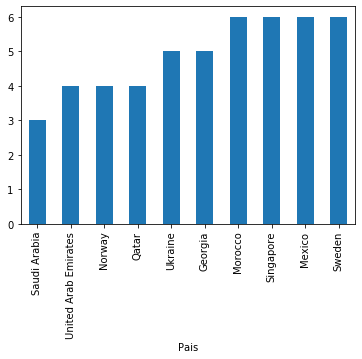

In [4]:
ind="Tax payments (number)"
datos[ind].dropna().sort_values().head(10).plot.bar()

La gráfica nos indica los países con un menor número de Tax Payments para lograr identificar aquellos en los cuales las empresas no están obligadas a pagar impuestos tan grandes y ver si eso influye en el desarrollo de lo mismos.

Por ahora, Arabia Saudita es un país donde a las empresas les sería más fácil desarrollarse (en cuanto a la materia de impuestos) y por consecuencia impulsar la economía de dicho país.

También se puede ver que México se encuentra dentro de este grupo de países.

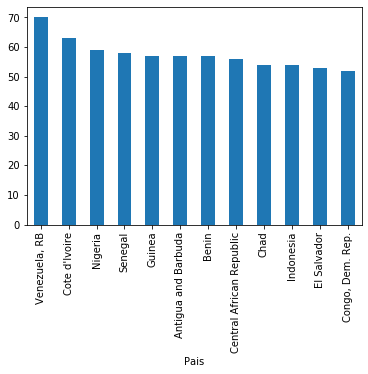

In [18]:
datos[ind].dropna().sort_values(ascending=False).head(12).plot.bar()

Este gráfico nos muestra lo contrario del anterior, es decir, aquellos países con un mayor número de impuestos.

Por conocimientos previos, se sabe que Venezuela no es una potencia económica a nivel mundial, y el hecho de que sea el país donde se le cobran más impuestos a las empresas refleja que muy probablemente este indicador nos ayude a diferenciar y clasificar aquellos países de primer mundo o en vías de desarrollo, siendo aquellos países desarrollados los que tengan un número bajo en este indicador en específico.

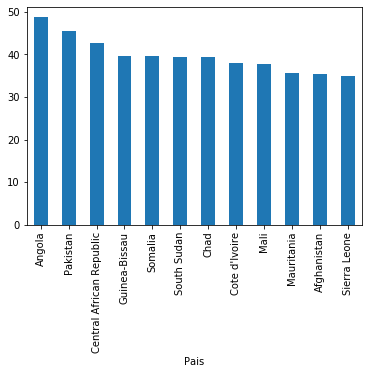

In [25]:
datos["Mortality rate, neonatal (per 1,000 live births)"].dropna().sort_values(ascending=False).head(12).plot.bar()

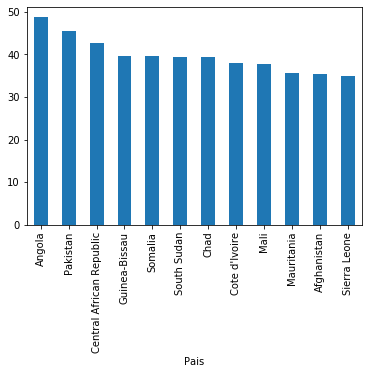

In [26]:
datos["Mortality rate, neonatal (per 1,000 live births)"].dropna().sort_values(ascending=False).head(12).plot.bar()

Analizando la mortalidad neonatal por cada 1,000 nacimientos, podemos analizar que los países con menor tasa, tienden a ser los catalogados como países de primer mundo, en cambio, los que se encuentran en pobreza extrema tienen una mayor tasa.

Demograficamente hablando, un indicador de desarrollo de mayor impacto es la mortalidad infantil, pues evidencia las carencias en los sistemas de salud internos.

Ahora, en lugar de hacer un análisis por indicador se analizarán los indicadores registrados para México

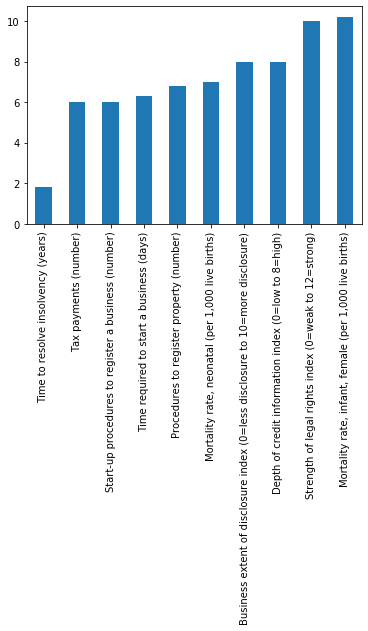

In [15]:
datos.loc["Mexico",datos.loc["Mexico",:]>1].sort_values().head(10).plot.bar()

Esta gráfica nos muestra los indicadores donde México tiene un bajo número (se excluyeron los indicadores que están expresados en decimales ya que no se alcanzaban a apreciar correctamente).

Con este nos damos cuenta que el número del indicador de Tax payments es bajo, lo cual se puede confirmar la conclusión de la primer gráfica donde México efectivamente es de los países con menos impuestos para las empresas.

### Scatterplot

Para lograr nuestro objetivo de clasificar a los países con base en sus indicadores de desarrollo, es necesario deshacernos de variables que tengan una correlación fuerte, dicho en otras palabras, quitar variables que estén muy relacionadas entre sí, ya que al final de cuentas sería como tener información repetida porque a lo mejor lo que nos dicen varios indicadores puede estar representado con uno solo.

Basados en la tabla de correlaciones calculadas anterioremente, veremos cómo se relacionan gráficamente la cantidad de especies de pájaros en peligro de extinción y las especies de plantas que también se encuentran en esa situación de un mismo país y ver si el hecho de que los pájaros estén desapareciendo se deba a la desaparición de plantas.

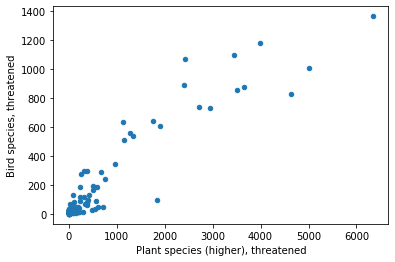

In [7]:
ind1="Bird species, threatened"
ind2="Plant species (higher), threatened"
datos[datos[ind1]<2000].plot.scatter(x=ind2,y=ind1)

Claramente estas dos variables parecen tener una relación creciente y hasta cierto punto proporcional, esto quiere decir que conforme sea mayor el número de especies de plantas en peligro de extinción, mayor será la cantidad de pájaros que también se irán extinguiendo.
Visto de este modo, un país que tenga uno de los dos indicadores altos, automáticamente el otro también será elevado, por lo que podríamos optar en deshacernos tal vez del indicador "Bird species, threatened" que al fin al cabo podremos saber más o menos los datos de este indicador con base en la variable "Plant species (higher), threatened".

En el scatterplot anterior, gracias a la distribución de los puntos, se puede notar claramente que los datos se encuentran mayormente concentrados en la esquina inferior izquierda, es decir,en la mayoría de los países son pocas las especies de pájaros y animales en peligro de exitinción, sin embargo también nos interesaría ver la concentración de los datos de los países donde estos números son más altos, es por eso que haremos una especie de "zoom" al área del gáfico donde los puntos están más dispersos y usaremos este gráfico de hexágonos en el que, entre más intenso sea el calor, más intensa es la concentración de datos.

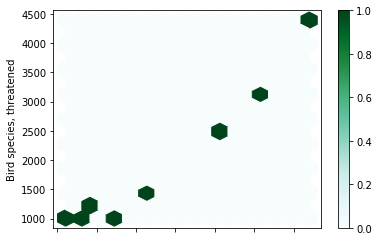

In [8]:
datos[datos[ind1]>1000].plot.hexbin(x=ind2, y=ind1, gridsize=15)

Podemos ver que en este caso las concentraciones están un poco más aisladas, pero se sigue manteniendo esa relación creciente. Sin emabrgo, la mayor concentración sigue estando en los valores inferiores, por lo que se podría concluir que son realmente pocos los países donde la concentración de especies en peligro de extinción es enorme.

### Stacked plots

Algunos indicadores son índices que van desde cero hasta cierto número, indicando qué tan bien o qué tan mal se encuentra posicionado un país en una determinada área del desarrollo.

Para este plot se analizarán los siguientes índices.

In [9]:
ind3="Strength of legal rights index (0=weak to 12=strong)"
ind4="Depth of credit information index (0=low to 8=high)"
ind5="Business extent of disclosure index (0=less disclosure to 10=more disclosure)"


Lo que queremos analizar es qué tantos países se encuentran en lo más bajo de estos indicadores, ver si son más de los que se encuentran en posiciones altas o si la mayoría está en un punto medio.

Para ello se van a crear 5 categorías:
* Bajo
* Medio bajo
* Medio
* Medio alto
* Alto

La división de cada indicador se hará con base en el rango de calificaciones y éste se dividirá en 5 partes iguales.

Categorías para el "Strength of legal rights index (0=weak to 12=strong)":

Este índice mide el grado en el que las leyes de bancarrota protegen los derechos de los prestadores y prestamistas y así facilitar el nivel de préstamos en un país.

In [10]:
legal=datos[ind3].dropna()
legal[datos[ind3].dropna()<=2.6]='low'
legal[(datos[ind3].dropna()<=5.2)&(datos[ind3].dropna()>2.6)]='medium low'
legal[(datos[ind3].dropna()<=7.8)&(datos[ind3].dropna()>5.2)]='medium'
legal[(datos[ind3].dropna()<=10.4)&(datos[ind3].dropna()>7.8)]='medium high'
legal[(datos[ind3].dropna()<=12)&(datos[ind3].dropna()>10.4)]='high'
legal.value_counts()

medium         67
medium low     65
low            50
medium high    28
high            8
Name: Strength of legal rights index (0=weak to 12=strong), dtype: int64

Categorías para el "Depth of credit information index (0=low to 8=high)":

Los valores más altos representan la habilidad de tener más información crediticia (ya sea por buró de crédito o por registros) para facilitar las decisiones de préstamos. Si el buró de crédito cubre menos del 5% de la población adulta, el valor es cero.

In [11]:
credit=datos[ind4].dropna()
credit[datos[ind4].dropna()<=1.6]='low'
credit[(datos[ind4].dropna()<=3.2)&(datos[ind4].dropna()>1.6)]='medium low'
credit[(datos[ind4].dropna()<=4.8)&(datos[ind4].dropna()>3.2)]='medium'
credit[(datos[ind4].dropna()<=6.4)&(datos[ind4].dropna()>4.8)]='medium high'
credit[(datos[ind4].dropna()<=8)&(datos[ind4].dropna()>6.4)]='high'
credit.value_counts()

high           72
low            63
medium high    54
medium         17
medium low     12
Name: Depth of credit information index (0=low to 8=high), dtype: int64

Categorías para el "Business extent of disclosure index (0=less disclosure to 10=more disclosure)":

Mide el grado en el que los inversionistas están protegidos a través de la divulación de propiedad e información financiera. Entre más alto el valor, se habla de una mayor divulgación.

In [12]:
busin=datos[ind5].dropna()
busin[datos[ind5].dropna()<=2]='low'
busin[(datos[ind5].dropna()<=4)&(datos[ind5].dropna()>2)]='medium low'
busin[(datos[ind5].dropna()<=6)&(datos[ind5].dropna()>4)]='medium'
busin[(datos[ind5].dropna()<=8)&(datos[ind5].dropna()>6)]='medium high'
busin[(datos[ind5].dropna()<=10)&(datos[ind5].dropna()>8)]='high'
busin.value_counts()

medium high    67
medium         57
medium low     49
low            25
high           20
Name: Business extent of disclosure index (0=less disclosure to 10=more disclosure), dtype: int64

A continuación se cuenta cuántos valores hay en cada categoría por cada índice y se grafican en un bar plot apilado horizontalmente con colores parecidos a los de un semáforo para así tener un análisis más visual.

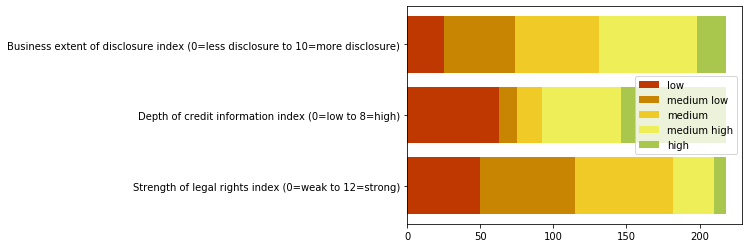

In [13]:
l=legal.value_counts()
c=credit.value_counts()
b=busin.value_counts()

bar1=[l['low'],c['low'],b['low']]
bar2=[l['medium low'],c['medium low'],b['medium low']]
bar3=[l['medium'],c['medium'],b['medium']]
bar4=[l['medium high'],c['medium high'],b['medium high']]
bar4=[l['medium high'],c['medium high'],b['medium high']]
bar5=[l['high'],c['high'],b['high']]

bars=np.add(bar1,bar2).tolist()
bars2=np.add(bars,bar3)
bars3=np.add(bars2,bar4)

names=[ind3,ind4,ind5]
r=[0,1,2]


plt.barh(r,bar1,color="#bf3701")
plt.barh(r,bar2,left=bar1,color="#c88501")
plt.barh(r,bar3,left=bars,color="#f0ca27")
plt.barh(r,bar4,left=bars2,color="#eeee59")
plt.barh(r,bar5,left=bars3,color="#a9c74d")

plt.yticks(r,names)
plt.legend(['low','medium low','medium','medium high','high'],)
plt.show()

El siguiente gráfico es como el anterior pero sin etiquetas, para que se alcance a apreciar mejor:

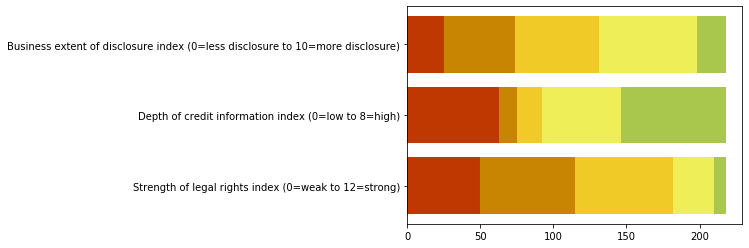

In [14]:
l=legal.value_counts()
c=credit.value_counts()
b=busin.value_counts()

bar1=[l['low'],c['low'],b['low']]
bar2=[l['medium low'],c['medium low'],b['medium low']]
bar3=[l['medium'],c['medium'],b['medium']]
bar4=[l['medium high'],c['medium high'],b['medium high']]
bar4=[l['medium high'],c['medium high'],b['medium high']]
bar5=[l['high'],c['high'],b['high']]

bars=np.add(bar1,bar2).tolist()
bars2=np.add(bars,bar3)
bars3=np.add(bars2,bar4)

names=[ind3,ind4,ind5]
r=[0,1,2]


plt.barh(r,bar1,color="#bf3701")
plt.barh(r,bar2,left=bar1,color="#c88501")
plt.barh(r,bar3,left=bars,color="#f0ca27")
plt.barh(r,bar4,left=bars2,color="#eeee59")
plt.barh(r,bar5,left=bars3,color="#a9c74d")

plt.yticks(r,names)

plt.show()

Con esto ya tenemos una perspectiva de lo que está pasando mundialmente con estos indicadores.

Como se explicó anteriormente, estos 3 indicadores están enfocados en la parte financiera, específicamente hablando de facilidades de créditos e inversiones y qué tan seguras son estas operaciones.

Con respecto al primer indicador, la mayoría de los países se encuentra en un punto medio en cuanto a la divulgación financiera que tienen en sus países para la protección de inversionistas. Por otro lado, en cuanto a la información crediticia la mayoría de los países se encuentran en ambos extremos, ya sea en un nivel bajo o en un nivel muy alto, esto se puede deber a que algunos países no cuentan con información de buró de crédito y eso hace que su calificación en el índice baje, y los que sí cuentan con este sistema de buró de crédito generalmente lo tienen muy bien estructurado y desarrollado, posicionándolos en altos rangos.

Por último, en el tercer indicador es muy raro ver países que se encuentren en un nivel alto, lo que nos dice que la mayoría de los países no cuentan con derechos fuertes que protejan a prestamistas en casos de bancarrota, lo que hace más difícil estas operaciones.

# Conclusiones Generales

Tras este analisís hemos encontrado un par de respuestas a nuestros objetivos, resaltando el impacto del acceso a un sistema de salud de primera para alcanzar un desarrollo social, además de los aspectos económicos en el nacimiento, crecimiento y consolidación de las empresas, para la generación de empleos.

Con esto, podemos marcar estas variables como de alto impacto en el desarrollo de un país, apoyando a la respuesta de los objetivos planteados. Consideramos que aún hay trabajo por hacer para destacar algunas variables que aparentemente no tengan relevacia pero estadísticamente sean de alto impacto.